In [1]:
import src.process as process
import src.model as model
import src.predict as predict

##### Import Test Data

In [2]:
start_yr = 2016
end_yr = 2020
path_blueprint = r'raw\data_{}.xlsx'
raw_data = process.merge_import_from_xlsx(start_yr, end_yr, path_blueprint)

data = process.select_clean_data(raw_data, min_instances = 50)

train_data, test_data = process.stratified_train_test_split(data)

##### Predict Test Labels

In [3]:
lookup_path = r"assets/lookup.pkl"
model_path = r"assets/trained_model.h5"
model_classes_path = r"assets/trained_model_classes.pkl"

In [4]:
y_pred = predict.predict_label(test_data, lookup_path, model_path, model_classes_path)

##### Evaluate Performance

In [5]:
y_test = test_data['Politikbereich']

In [6]:
import pandas as pd
from sklearn.metrics import f1_score, multilabel_confusion_matrix, recall_score
import pickle
classes = pickle.load(open(model_classes_path, "rb"))

performance = pd.DataFrame(f1_score(y_test, y_pred, average = None, labels = classes), index = classes, columns =  ['f1_score'])
performance['confusion_matrix_TN_FP_FN_TP'] = multilabel_confusion_matrix(y_test, y_pred, labels = classes).tolist()
performance['recall_score'] = recall_score(y_test, y_pred, average = None, labels = classes)

In [26]:
accuracy = sum(y_test == y_pred)/len(y_test)
print("The Model's Test Accuracy is {:.3f}".format(accuracy))

The Model's Test Accuracy is 0.677


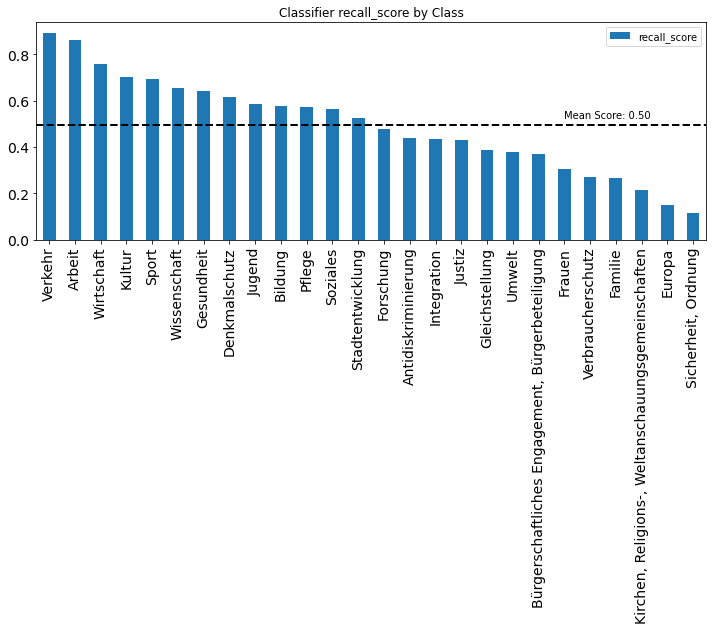

In [23]:
model.plot_performance(performance, score = 'recall_score')